In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# plotting settings
# ensure all plots have white backgrounds and no transparent axes
plt.rcParams['axes.facecolor'] = 'white'


plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.titlesize'] = 19
plt.rcParams['axes.labelpad'] = 15
plt.rcParams['xtick.labelsize'] = 19
plt.rcParams['ytick.labelsize'] = 19
plt.rcParams['legend.fontsize'] = 25
plt.rcParams['figure.titlesize'] = 19
plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['errorbar.capsize'] = 3.0

In [2]:

# Number of steps and states
num_steps = 50  # Adjust this to control the length of the walk
num_states = 10

In [84]:

# Function to generate a random walk
def random_walk(num_steps, num_states):
    steps = np.random.choice([-1, 1], size=num_steps)
    walk = np.cumsum(steps) + 1
    walk = np.clip(walk, 1, num_states)  # Constrain the walk within the state limits
    return walk

In [85]:
# Function to generate a random walk with reduced zero-movement steps
def biased_random_walk(num_steps, num_states):
    walk = np.zeros(num_steps, dtype=int)
    walk[0] = np.random.randint(1, num_states+1)  # Start at a random state
    for i in range(1, num_steps):
        move = np.random.choice([-1, 1])
        next_state = walk[i-1] + move
        if next_state < 1 or next_state > num_states:
            next_state = walk[i-1]  # Stay in the same state if we would go out of bounds
        walk[i] = next_state
    return walk

In [92]:

# Generate three random walks
np.random.seed(270691)  # Seed 1
# np.random.seed(1337)
walk1 = biased_random_walk(num_steps, num_states)
walk2 = biased_random_walk(num_steps, num_states)
walk3 = biased_random_walk(num_steps, num_states)

In [93]:
# Function to smooth the random walk
def smooth_walk(walk, window_size=3):
    return np.convolve(walk, np.ones(window_size)/window_size, mode='same')

In [94]:
# Apply smoothing to the walks
smooth_walk1 = smooth_walk(walk1)
smooth_walk2 = smooth_walk(walk2)
smooth_walk3 = smooth_walk(walk3)

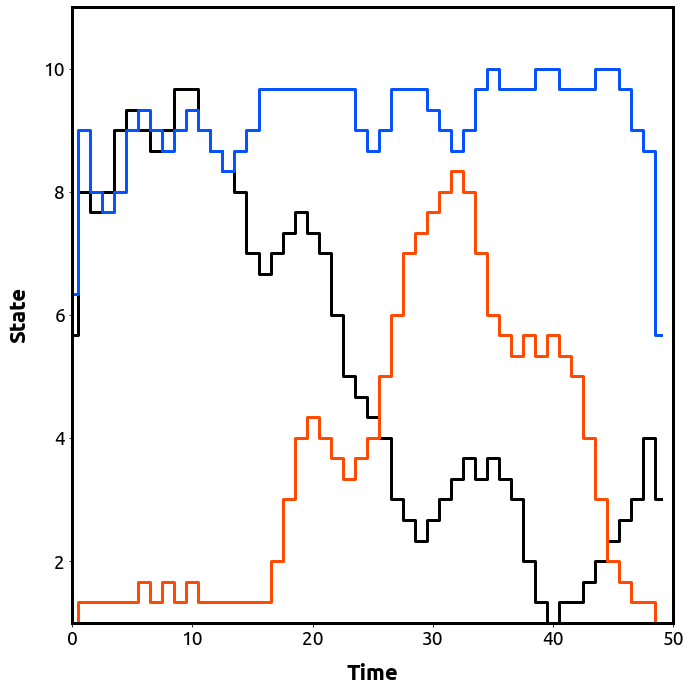

In [97]:

# Plotting
plt.figure(figsize=(10, 10))
time = np.arange(num_steps)

plt.step(time, smooth_walk1, where='mid', color="black")
plt.step(time, smooth_walk2, where='mid', color="#0652ff")
plt.step(time, smooth_walk3, where='mid', color="#fe4b03")

plt.xlabel('Time')
plt.ylabel('State')
plt.ylim(1, num_states+1)
plt.xlim(0, num_steps)
# plt.legend(frameon=False)
plt.grid(False)
plt.tight_layout()
plt.savefig("figures/three-random-walks.png", dpi=300)
